**Mini Project**
**Using Reddit to find answers for "Best Facial in NYC"**

- The idea of this project is to go through threads in Reddit to extract Facial business names, prices, and links to find the best facial recommended in NYC since it is where I live and it's a topic I've been researching for myself.
- I started with 1 thread, but was unable to get enough insight so I have scraped through 11 threads (each labeled below)

In [1]:
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd

#manually look through each thread to get all business names
known_businesses = [
    "Rescue Spa", "Heyday", "Ling Ling Beauty", "Bellanova Beauty Lab", "SJ skin", "House of Pietro Simone", "avani beauty",
    "SkinSpoke", "Atelier clinic", "Mario Badescu", "Sia Beauty", "Silver mirror", "Chateau Glow", "Chelsea hotel",
    "K skinscare", "KUR", "Savor Spa", "Racquel", "JS beauty spa", "glowbar", "Marietta", "Buttercup Skin Care", 
    "face gym", "moonflower spa", "City Glow", "Crystal Greene", "skin laundry", "spencer", "Buttercup", "glo up", 
    "Beauty Up Wellness", "Defined Face Therapy", "Christine Chin", "diana spa", "haven", "Glow by Miss Izzy Rose",
    "Jewell House", "beauty up and wellness"
]

urls = [
    #thread 1
    "https://old.reddit.com/r/NYCbitcheswithtaste/comments/1dcmvku/monthly_facial_recommendations/",
    #thread 2
    "https://old.reddit.com/r/NYCbitcheswithtaste/comments/1pay7je/nyc_facial_recommendations/",
    #thread 3
    "https://old.reddit.com/r/NYCbitcheswithtaste/comments/1egpxe5/best_nyc_facial/",
    #thread 4
    "https://old.reddit.com/r/NYCbitcheswithtaste/comments/1kiw30w/moderately_priced_manhattan_facials_roundup_and/",
    #thread 5
    "https://old.reddit.com/r/NYCbitcheswithtaste/comments/1pe43sy/facial_reviews/",
    #thread 6
    "https://old.reddit.com/r/NYCbitcheswithtaste/comments/1bhh8l0/where_are_we_getting_our_facials/",
    # thread 7
    "https://old.reddit.com/r/NYCbitcheswithtaste/comments/1jva489/best_extraction_facials/",
    # thread 8
    "https://www.reddit.com/r/NYCbitcheswithtaste/comments/1ijxtw7/facials_in_nyc_under_100/",
    # thread 9
    "https://www.reddit.com/r/NYCbitcheswithtaste/comments/1pe43sy/facial_reviews/",
    #thread 10
    "https://www.reddit.com/r/NYCbitcheswithtaste/comments/1hedyus/can_someone_recommend_best_place_to_get_a_facial/",
    # thread 11
    "https://www.reddit.com/r/NYCbitcheswithtaste/comments/1kiw30w/moderately_priced_manhattan_facials_roundup_and/"
]

results = []

for url in urls:
    headers = {"User-Agent": "Mozilla"}
    result = requests.get(url, headers=headers, timeout=10)
    soup = BeautifulSoup(result.text, "lxml")
    comments = soup.find_all("div", class_="usertext-body")
    
    print(f"Scraping: {url}")
    print(f"Comments found: {len(comments)}")
    
    for c in comments:
        text = c.get_text()
        # all lower text
        found_businesses = [b for b in known_businesses if b.lower() in text.lower()]
        # optional $, with 1 or more digit, optional '.', with 2 digit
        prices = re.findall(r'\$?\d+(?:\.\d{2})?', text)
        # created a range to filter our unrealistic prices
        prices = [p for p in prices if 30 <= int(re.sub(r'[^\d]', '', p)) <= 500]
        
        if found_businesses:
            results.append({
                "business": ", ".join(found_businesses),
                "prices_mentioned": prices,
                "avg_price": sum([int(re.sub(r'[^\d]', '', p)) for p in prices]) / len(prices) if prices else None,
                "comment_text": text[:300],
                "source_url": url
            })
    
    print(f"Total results so far: {len(results)}")

df = pd.DataFrame(results)
print(df)

Scraping: https://old.reddit.com/r/NYCbitcheswithtaste/comments/1dcmvku/monthly_facial_recommendations/
Comments found: 107
Total results so far: 34
Scraping: https://old.reddit.com/r/NYCbitcheswithtaste/comments/1pay7je/nyc_facial_recommendations/
Comments found: 57
Total results so far: 57
Scraping: https://old.reddit.com/r/NYCbitcheswithtaste/comments/1egpxe5/best_nyc_facial/
Comments found: 58
Total results so far: 69
Scraping: https://old.reddit.com/r/NYCbitcheswithtaste/comments/1kiw30w/moderately_priced_manhattan_facials_roundup_and/
Comments found: 56
Total results so far: 94
Scraping: https://old.reddit.com/r/NYCbitcheswithtaste/comments/1pe43sy/facial_reviews/
Comments found: 34
Total results so far: 106
Scraping: https://old.reddit.com/r/NYCbitcheswithtaste/comments/1bhh8l0/where_are_we_getting_our_facials/
Comments found: 22
Total results so far: 115
Scraping: https://old.reddit.com/r/NYCbitcheswithtaste/comments/1jva489/best_extraction_facials/
Comments found: 23
Total res

**tried using tree.xpath to find all comments, but according to Claude, `Shreddit-comment` (where comment is located) in reddit is actually Javascript, so I will have to either use selenium or switch to "old reddit" url, which I did (Anthropic, 2026).**

**explanation**
- A `known businesses` list was added on top since multiple attempts and methods were used to scrape it out of each comment but failed. Attempted to use `spacy` as suggested by Claude (Anthropic, 2026), however the results were very inaccurate.
- After inspecting different solutions, I found the easiest way was to manually clean out business names as I scroll through the threads to be scraped from.
- Each thread was inspected, I tried to pick the threads that had the most comments and insights such as Business name and prices.
- an empty `results` list is added on top as well to add all info scraped into.
- looked up xpath for all comments first with "inspect" along with price and business names
- append found info to `results`and added a column `average price` since some comments claim different prices for 1 business, also added the comment text source and url in case needed.

In [2]:
# split multi-business rows into individual rows
df_exploded = df["business"].str.split(", ").explode().str.strip()

# count mentions
mention_counts = df_exploded.value_counts().reset_index()
mention_counts.columns = ["business", "mentions"]
print(mention_counts)

                  business  mentions
0               Rescue Spa        19
1                   Heyday        15
2           Christine Chin        13
3            Silver mirror        11
4                    haven        11
5            Mario Badescu        11
6                      KUR        10
7                  glowbar        10
8                Buttercup         6
9                City Glow         5
10                 spencer         3
11          moonflower spa         3
12                face gym         3
13     Buttercup Skin Care         2
14            skin laundry         2
15               Savor Spa         2
16            Jewell House         1
17  Glow by Miss Izzy Rose         1
18                  glo up         1
19          Crystal Greene         1
20  beauty up and wellness         1
21                 Racquel         1
22            avani beauty         1
23           Chelsea hotel         1
24            Chateau Glow         1
25              Sia Beauty         1
2

**explanation**
- Using `value_counts` and `reset_index` to sort the number of mentions for each business.
- renamed the columns as well

In [3]:
df_split = df.copy()
# splits business if they in the same row
df_split["business"] = df_split["business"].str.split(", ")
df_split = df_split.explode("business").reset_index(drop=True)

# group by business
summary = df_split.groupby("business").agg(
    mentions=("business", "count"),
    avg_price=("avg_price", "mean")
).reset_index()

summary = summary.sort_values("mentions", ascending=False)
print(summary)

                  business  mentions   avg_price
20              Rescue Spa        19  225.000000
11                  Heyday        15  138.750000
6           Christine Chin        13  213.750000
18           Mario Badescu        11   77.988889
24           Silver mirror        11  112.000000
31                   haven        11   84.375000
15                     KUR        10   71.222222
30                 glowbar        10   60.000000
2                Buttercup         6  108.770833
7                City Glow         5  131.222222
28                face gym         3  108.000000
34                 spencer         3  152.250000
32          moonflower spa         3  113.333333
22               Savor Spa         2  175.000000
33            skin laundry         2         NaN
3      Buttercup Skin Care         2  130.000000
27  beauty up and wellness         1  220.000000
26            avani beauty         1         NaN
25               SkinSpoke         1         NaN
23              Sia 

**explanation**
- added an average price row for each business

In [4]:
summary.to_csv("nyc_facials_summary_copy.csv", index=False)

In [5]:
df = pd.read_csv("nyc_facials_summary_copy.csv")
df.head()

,business,mentions,avg_price
0,Rescue Spa,19,225.000000
1,Heyday,15,138.750000
2,Christine Chin,13,213.750000
3,Mario Badescu,11,77.988889
4,Silver mirror,11,112.000000


**explanation**
- save to csv and inspected first few rows 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   business   35 non-null     object 
 1   mentions   35 non-null     int64  
 2   avg_price  24 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 972.0+ bytes


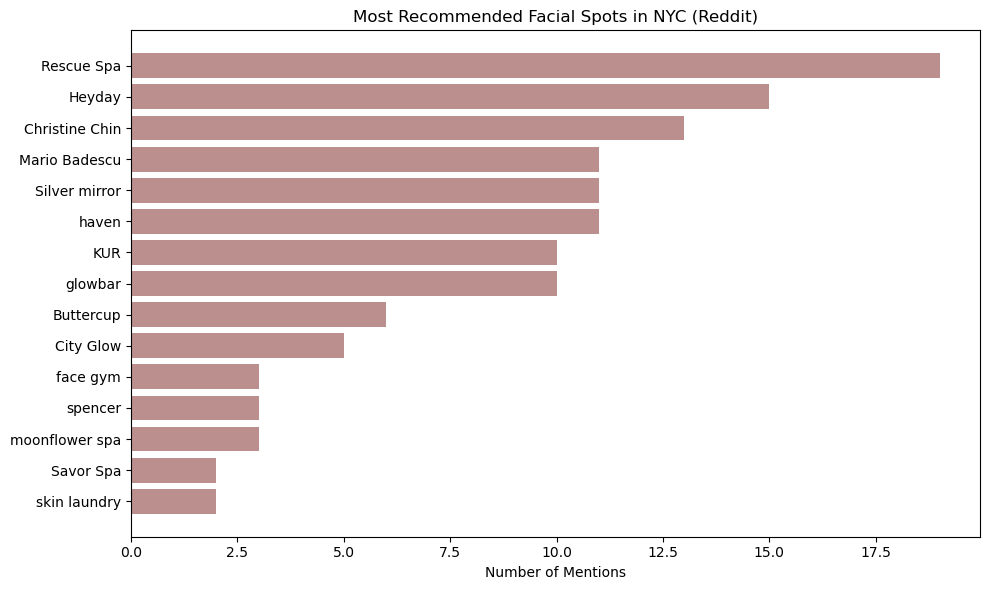

In [7]:
# popularity ranking plot
import matplotlib.pyplot as plt

#top 15, in ascending order
top = summary.sort_values("mentions", ascending=True).tail(15)

plt.figure(figsize=(10, 6))
#horizontal bar (y,x)
plt.barh(top["business"], top["mentions"], color="rosybrown")
plt.xlabel("Number of Mentions")
plt.title("Most Recommended Facial Spots in NYC (Reddit)")
#automatically adjust spacing
plt.tight_layout()
plt.savefig("mentions.png")
plt.show()

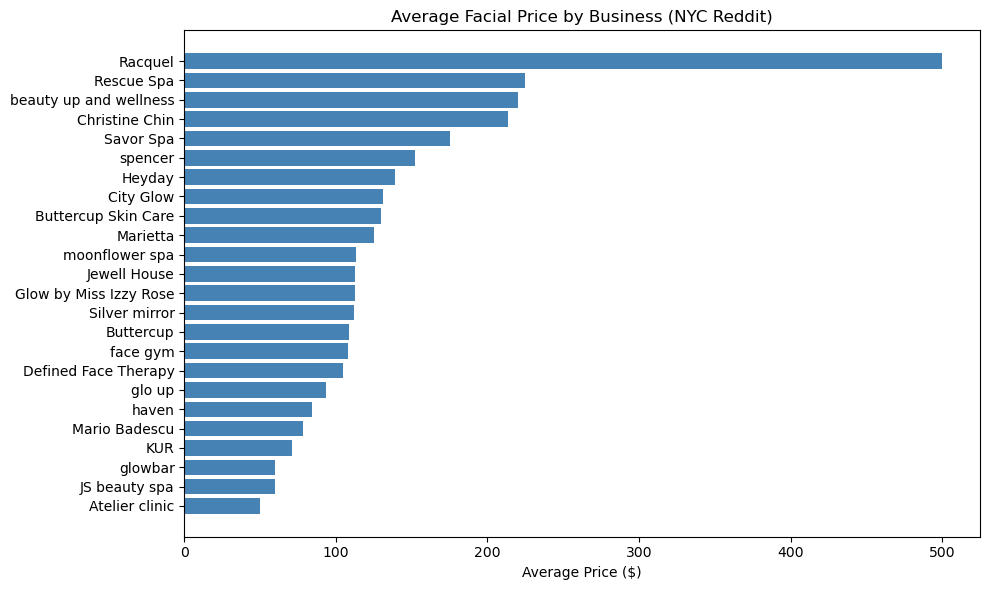

In [8]:
# price 
#remove nan rows and sort value
price_df = summary.dropna(subset=["avg_price"]).sort_values("avg_price", ascending=True)

plt.figure(figsize=(10, 6))
plt.barh(price_df["business"], price_df["avg_price"], color="steelblue")
plt.xlabel("Average Price ($)")
plt.title("Average Facial Price by Business (NYC Reddit)")
plt.tight_layout()
plt.savefig("prices.png")
plt.show()

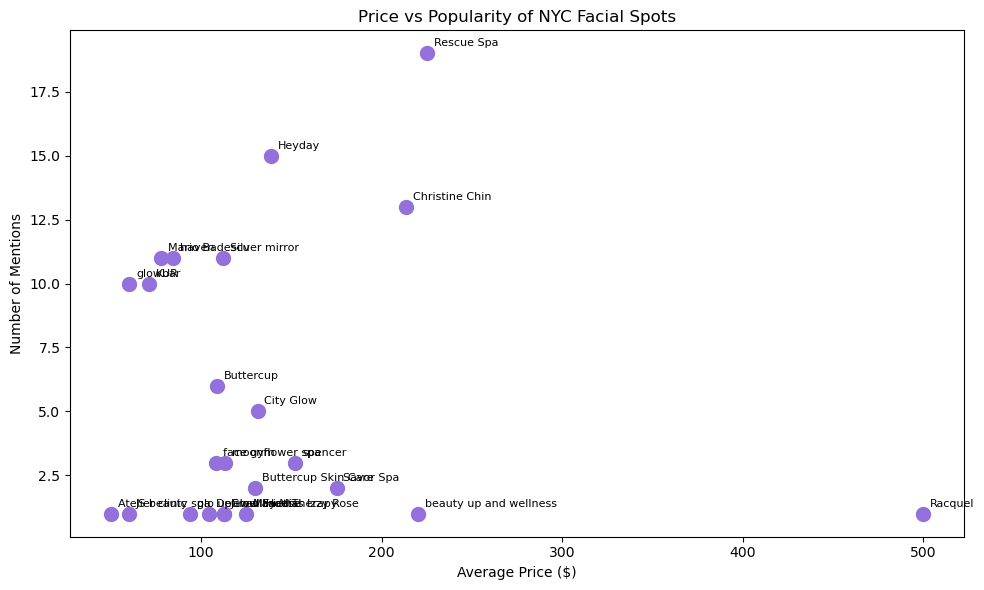

In [9]:
# price vs mention
#drop nan rows
scatter_df = summary.dropna(subset=["avg_price"])

plt.figure(figsize=(10, 6))
#scatter graph(x,y)
plt.scatter(scatter_df["avg_price"], scatter_df["mentions"], color="mediumpurple", s=100)

# label each dot with business name
for _, row in scatter_df.iterrows():
    plt.annotate(row["business"], (row["avg_price"], row["mentions"]),
                 textcoords="offset points", xytext=(5, 5), fontsize=8)

plt.xlabel("Average Price ($)")
plt.ylabel("Number of Mentions")
plt.title("Price vs Popularity of NYC Facial Spots")
plt.tight_layout()
plt.savefig("price_vs_mentions.png")
plt.show()

**explanation**
- 3 plots were made comparing:
  1. Business popularity
     - Graph has shown that the most mentioned facial business is Rescue Spa
  2. Average prices
     - Highest price is Racquel
  3. Price vs Popularity
     - The graph makes it easy to spot popular mentions within each person's budget.
     - For example, if my budget is between $100-$200, I can see the best option would be Heyday

After analyzing all 7 threads, I also went on to inspect each business's website, just to see how accurate the comparisons are, and it matches with all results found.

**Selenium scrape below**

- after finding out we're allowed to use selenium for this project, I went back to scrape more info from Google map to gain insights.

Steps for scrape below:
- Hardcoded top 15 business urls on google map after failing to retrieve them from selenium. Since google map has too many sponsors, I cannot get selenium to click on the right business name. Even when I tried skipping "sponsored posts", the correct business result is not guaranteed. After consulting with Claude (Anthropic, 2026), I found the quickest way is to retrieve top business manually to ensure correct paths
- set up  drive and retrieved:
  - rating
  - number of reviews
  - average price if mentioned in comments
- As the result showed, I was not able to get most prices, but I had the info from my reddit scrape.
- Merged google map results with reddit result.
- created 2 plots
  1. google rating rankings
  2. combined ranking with google map and reddit

In [10]:
business_urls = {
    "Rescue Spa": "https://www.google.com/maps/place/Rescue+Spa/@40.7383571,-73.9891193,17z/data=!3m1!4b1!4m6!3m5!1s0x89c259a22962f0ab:0xb637929f06b03e9e!8m2!3d40.7383571!4d-73.9891193!16s%2Fg%2F11gbf8r2rk?entry=ttu&g_ep=EgoyMDI2MDIxOC4wIKXMDSoASAFQAw%3D%3D",
    "Heyday": "https://www.google.com/maps/place/Heyday+Skincare+Nomad/@40.7383566,-73.9968441,15z/data=!4m10!1m2!2m1!1sheyday!3m6!1s0x89c259a42a17e7d3:0x2c5433548088ec62!8m2!3d40.7432867!4d-73.988817!15sCgZoZXlkYXlaCCIGaGV5ZGF5kgEKZmFjaWFsX3NwYZoBI0NoWkRTVWhOTUc5blMwVkpRMEZuU1VSbWJ6Vk1kMEYzRUFF4AEA-gEECAAQPQ!16s%2Fg%2F11c3k695y1?entry=ttu&g_ep=EgoyMDI2MDIxOC4wIKXMDSoASAFQAw%3D%3D",
    "Christine Chin": "https://www.google.com/maps/place/Christine+Chin+Spa/@40.7178442,-73.9951412,16z/data=!3m1!4b1!4m6!3m5!1s0x89c259873ff2836f:0x418788db9ddc2e5a!8m2!3d40.7178443!4d-73.9902703!16s%2Fg%2F1tx_78bm?entry=ttu&g_ep=EgoyMDI2MDIxOC4wIKXMDSoASAFQAw%3D%3D",
    "Mario Badesque": "https://www.google.com/maps/place/Mario+Badescu+Skin+Care/@40.755653,-73.9693399,17z/data=!3m1!4b1!4m6!3m5!1s0x89c258e3c9c1b949:0xd9709c386f1c5d0!8m2!3d40.755653!4d-73.966765!16s%2Fg%2F1tds7m34?entry=ttu&g_ep=EgoyMDI2MDIxOC4wIKXMDSoASAFQAw%3D%3D",
    "Silver mirror": "https://www.google.com/maps/place/Silver+Mirror+Facial+Bar+-+Upper+East+Side/@40.7556525,-73.9770647,15z/data=!4m10!1m2!2m1!1ssilver+mirror!3m6!1s0x89c258eeceaf9871:0x2c59e600faea3a74!8m2!3d40.7658912!4d-73.9657756!15sCg1zaWx2ZXIgbWlycm9ykgEKZmFjaWFsX3NwYeABAA!16s%2Fg%2F11cnddrkqw?entry=ttu&g_ep=EgoyMDI2MDIxOC4wIKXMDSoASAFQAw%3D%3D",
    "Kur skin lab": "https://www.google.com/maps/place/KUR+Skin+Lab/@40.7571939,-73.9740567,17z/data=!3m2!4b1!5s0x89c258e34f3ae8b9:0xf4d813acf0023586!4m6!3m5!1s0x89c258e36ed53463:0x1b0e9ff086812f31!8m2!3d40.757194!4d-73.9691858!16s%2Fg%2F11b7gxqc3f?entry=ttu&g_ep=EgoyMDI2MDIxOC4wIKXMDSoASAFQAw%3D%3D",
    "glowbar": "https://www.google.com/maps/place/Glowbar+Upper+East+Side/@40.7696004,-73.9801236,15z/data=!4m10!1m2!2m1!1sglow+bar!3m6!1s0x89c259c7c38193d1:0x9319276581d86536!8m2!3d40.7696004!4d-73.9610692!15sCghnbG93IGJhcloKIghnbG93IGJhcpIBCmZhY2lhbF9zcGGaAURDaTlEUVVsUlFVTnZaRU5vZEhsalJqbHZUMnQ0VW1KcldUTmxVRUpUVXpCU1VHSkZlRE5YU0dkNFRrVjNlVlZWUlJBQuABAPoBBQiTARA9!16s%2Fg%2F11hpd0ghrk?entry=ttu&g_ep=EgoyMDI2MDIxOC4wIKXMDSoASAFQAw%3D%3D",
    "buttercup skincare": "https://www.google.com/maps/place/Buttercup+Skin+Care/@40.7644559,-73.9816397,17z/data=!3m2!4b1!5s0x87b9be5ce88da1b9:0xbfe308a13dc8394d!4m6!3m5!1s0x89c259aec7540529:0x1b9a47dda944c245!8m2!3d40.764456!4d-73.9767688!16s%2Fg%2F11gslt7425?entry=ttu&g_ep=EgoyMDI2MDIxOC4wIKXMDSoASAFQAw%3D%3D",
    "city glow": "https://www.google.com/maps/place/City+Glow/@40.7259233,-73.9900038,16z/data=!3m1!4b1!4m6!3m5!1s0x89c259834a7faaab:0xc5590aa3989474b4!8m2!3d40.7259233!4d-73.9874289!16s%2Fg%2F11hcv1g25_?entry=ttu&g_ep=EgoyMDI2MDIxOC4wIKXMDSoASAFQAw%3D%3D",
    "spencer's": "https://www.google.com/maps/place/SPENCER'S/@40.723566,-74.0361338,14z/data=!4m10!1m2!2m1!1sspencer+facial+nyc!3m6!1s0x89c25900a1fea3e9:0xfa54ade2fa0fab4c!8m2!3d40.7235657!4d-73.9980251!15sChJzcGVuY2VyIGZhY2lhbCBueWNaFCISc3BlbmNlciBmYWNpYWwgbnljkgEDc3BhmgEkQ2hkRFNVaE5NRzluUzBWSlEwRm5TVVEzZFRoTGQyNTNSUkFC4AEA-gEFCI0BEEI!16s%2Fg%2F11lmjr53tp?entry=ttu&g_ep=EgoyMDI2MDIxOC4wIKXMDSoASAFQAw%3D%3D",
    "moonflower spa": "https://www.google.com/maps/place/Moonflower+spa/@40.7483764,-73.9848009,17z/data=!3m1!4b1!4m6!3m5!1s0x89c2590058733101:0xae45650b880f68c5!8m2!3d40.7483765!4d-73.97993!16s%2Fg%2F1tfpw5fd?entry=ttu&g_ep=EgoyMDI2MDIxOC4wIKXMDSoASAFQAw%3D%3D",
    "face gym": "https://www.google.com/maps/place/FACEGYM+SAKS+Fifth+Avenue/@40.7483745,-74.0028256,14z/data=!3m1!5s0x89c258fbb8b9ce4d:0x85d3c06b9b09ff59!4m10!1m2!2m1!1sface+gym!3m6!1s0x89c259f7de1ac07d:0x4d8b596444f8917d!8m2!3d40.758098!4d-73.976944!15sCghmYWNlIGd5bZIBFmhlYWx0aF9hbmRfYmVhdXR5X3Nob3DgAQA!16s%2Fg%2F11gmflp8td?entry=ttu&g_ep=EgoyMDI2MDIxOC4wIKXMDSoASAFQAw%3D%3D",
    "skin laundry": "https://www.google.com/maps/place/Skin+Laundry+-+Midtown+East/@40.7483434,-74.0646271,12z/data=!4m10!1m2!2m1!1sSkin+Laundry!3m6!1s0x89c258e38f3e9767:0x89f2d908911b14de!8m2!3d40.7574551!4d-73.9674876!15sCgxTa2luIExhdW5kcnkiA4gBAVoOIgxza2luIGxhdW5kcnmSARBza2luX2NhcmVfY2xpbmlj4AEA!16s%2Fg%2F11clt9chmx?entry=ttu&g_ep=EgoyMDI2MDIxOC4wIKXMDSoASAFQAw%3D%3D",
    "savor beauty and spa": "https://www.google.com/maps/place/Savor+Beauty+%2B+Spa/@40.7482848,-74.0646273,12z/data=!3m1!5s0x89c2588586d0092b:0x4a284c5b51946c66!4m10!1m2!2m1!1ssavor+spa!3m6!1s0x89c2588f7e006b63:0x734fdb9d1557e96d!8m2!3d40.7836873!4d-73.9744398!15sCglzYXZvciBzcGEiA4gBAVoLIglzYXZvciBzcGGSAQpmYWNpYWxfc3Bh4AEA!16s%2Fg%2F11c5xwgx2d?entry=ttu&g_ep=EgoyMDI2MDIxOC4wIKXMDSoASAFQAw%3D%3D",
    "haven": "https://www.google.com/maps/place/Haven/@40.7284936,-73.9977938,17z/data=!3m1!4b1!4m6!3m5!1s0x89c2598ef9a4a59d:0x2f27b10c3a8e0226!8m2!3d40.7284936!4d-73.9952189!16s%2Fg%2F1tdmqzry?entry=ttu&g_ep=EgoyMDI2MDIxOC4wIKXMDSoASAFQAw%3D%3D"
}

In [11]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
import time
import pandas as pd
import re

path = "/Users/vivianwu/Desktop/Web Scraping/chromedriver"
service = Service(executable_path=path)
driver = webdriver.Chrome(service=service)

In [12]:
results_maps = []

for business, url in business_urls.items():
    driver.get(url)
    time.sleep(4)  # wait for page to fully load
    
    # rating
    try:
        rating_el = driver.find_element(By.XPATH, "//div[contains(@class, 'F7nice')]")
        rating = rating_el.text.split()[0]
    except:
        rating = None
    
    # number of reviews
    try:
        reviews_el = driver.find_element(By.XPATH, "//div[contains(@class, 'HHrUdb')]")
        reviews = re.sub(r'[^\d]', '', reviews_el.text.split()[0])
    except:
        reviews = None

    # click more reviews button if available
    try:
        more_btn = driver.find_element(By.XPATH, "//button[contains(@aria-label, 'More reviews')]")
        more_btn.click()
        time.sleep(2)
    except:
        pass

    # scrape prices from comments
    try:
        comment_els = driver.find_elements(By.XPATH, "//div[contains(@class, 'MyEned')]")
        all_prices = []
        for comment in comment_els:
            text = comment.text
            prices = re.findall(r'\$\d+', text)
            all_prices.extend(prices)
        avg_price = sum([int(p.replace('$', '')) for p in all_prices]) / len(all_prices) if all_prices else None
    except:
        avg_price = None

    results_maps.append({
        "business": business,
        "google_rating": rating,
        "google_reviews": reviews,
        "avg_price_from_reviews": avg_price
    })

    print(f"Done: {business} | Rating: {rating} | Reviews: {reviews} | Avg Price: {avg_price}")
    time.sleep(2)

driver.quit()

df_maps = pd.DataFrame(results_maps)
print(df_maps)

Done: Rescue Spa | Rating: 4.4 | Reviews: None | Avg Price: None
Done: Heyday | Rating: 4.7 | Reviews: 347 | Avg Price: None
Done: Christine Chin | Rating: 4.1 | Reviews: 49 | Avg Price: None
Done: Mario Badesque | Rating: 3.9 | Reviews: 142 | Avg Price: 65.0
Done: Silver mirror | Rating: 4.6 | Reviews: 160 | Avg Price: None
Done: Kur skin lab | Rating: 4.9 | Reviews: 602 | Avg Price: None
Done: glowbar | Rating: 4.6 | Reviews: 256 | Avg Price: None
Done: buttercup skincare | Rating: 4.7 | Reviews: 289 | Avg Price: None
Done: city glow | Rating: 4.8 | Reviews: 182 | Avg Price: None
Done: spencer's | Rating: 4.8 | Reviews: 431 | Avg Price: None
Done: moonflower spa | Rating: 4.9 | Reviews: 49 | Avg Price: None
Done: face gym | Rating: 3.8 | Reviews: 68 | Avg Price: None
Done: skin laundry | Rating: 4.6 | Reviews: 240 | Avg Price: None
Done: savor beauty and spa | Rating: 4.8 | Reviews: 267 | Avg Price: None
Done: haven | Rating: 4.6 | Reviews: None | Avg Price: None
                busi

In [13]:
# drop avg_price column since it's mostly None
df_maps_clean = df_maps[["business", "google_rating", "google_reviews"]].copy()

# convert to proper types
df_maps_clean["google_rating"] = pd.to_numeric(df_maps_clean["google_rating"], errors="coerce")
df_maps_clean["google_reviews"] = pd.to_numeric(df_maps_clean["google_reviews"], errors="coerce")

print(df_maps_clean)

                business  google_rating  google_reviews
0             Rescue Spa            4.4             NaN
1                 Heyday            4.7           347.0
2         Christine Chin            4.1            49.0
3         Mario Badesque            3.9           142.0
4          Silver mirror            4.6           160.0
5           Kur skin lab            4.9           602.0
6                glowbar            4.6           256.0
7     buttercup skincare            4.7           289.0
8              city glow            4.8           182.0
9              spencer's            4.8           431.0
10        moonflower spa            4.9            49.0
11              face gym            3.8            68.0
12          skin laundry            4.6           240.0
13  savor beauty and spa            4.8           267.0
14                 haven            4.6             NaN


In [14]:
# reddit summary
summary = pd.read_csv("nyc_facials_summary_copy.csv")

# merge on business name (left join keeps all reddit businesses)
merged_df = summary.merge(df_maps_clean, on="business", how="left")

print(merged_df)
merged_df.to_csv("nyc_facials_final_copy.csv", index=False)

                  business  mentions   avg_price  google_rating  \
0               Rescue Spa        19  225.000000            4.4   
1                   Heyday        15  138.750000            4.7   
2           Christine Chin        13  213.750000            4.1   
3            Mario Badescu        11   77.988889            NaN   
4            Silver mirror        11  112.000000            4.6   
5                    haven        11   84.375000            4.6   
6                      KUR        10   71.222222            NaN   
7                  glowbar        10   60.000000            4.6   
8                Buttercup         6  108.770833            NaN   
9                City Glow         5  131.222222            NaN   
10                face gym         3  108.000000            3.8   
11                 spencer         3  152.250000            NaN   
12          moonflower spa         3  113.333333            4.9   
13               Savor Spa         2  175.000000            Na

In [15]:
# fix mismatch business names 
name_fixes = {
    "Kur skin lab": "KUR",
    "Mario Badesque": "Mario Badescu",
    "buttercup skincare": "Buttercup Skin Care",
    "city glow": "City Glow",
    "face gym": "face gym",
    "savor beauty and spa": "Savor Spa",
    "skin laundry": "skin laundry",
    "spencer's": "spencer"
}

df_maps_clean["business"] = df_maps_clean["business"].replace(name_fixes)

merged_df = summary.merge(df_maps_clean, on="business", how="left")
print(merged_df)

                  business  mentions   avg_price  google_rating  \
0               Rescue Spa        19  225.000000            4.4   
1                   Heyday        15  138.750000            4.7   
2           Christine Chin        13  213.750000            4.1   
3            Mario Badescu        11   77.988889            3.9   
4            Silver mirror        11  112.000000            4.6   
5                    haven        11   84.375000            4.6   
6                      KUR        10   71.222222            4.9   
7                  glowbar        10   60.000000            4.6   
8                Buttercup         6  108.770833            NaN   
9                City Glow         5  131.222222            4.8   
10                face gym         3  108.000000            3.8   
11                 spencer         3  152.250000            4.8   
12          moonflower spa         3  113.333333            4.9   
13               Savor Spa         2  175.000000            4.

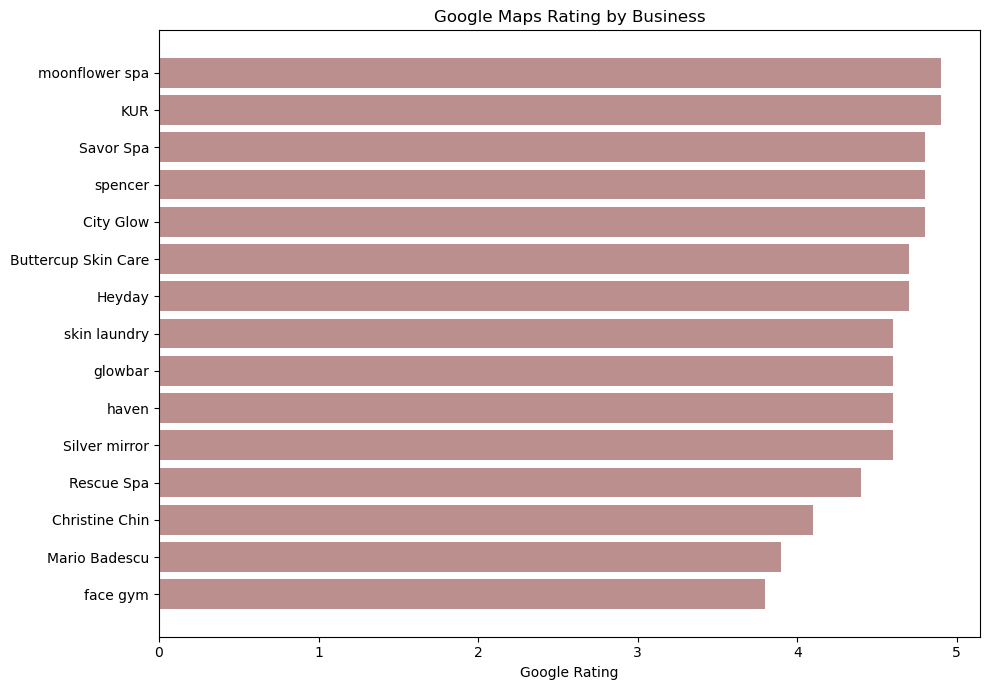

In [16]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# filter to businesses with at least 2 mentions for cleaner plots
top_df = merged_df[merged_df["mentions"] >= 2].copy()

# google rating
rating_sorted = top_df.dropna(subset=["google_rating"]).sort_values("google_rating", ascending=True)

plt.figure(figsize=(10, 7))
plt.barh(rating_sorted["business"], rating_sorted["google_rating"], color="rosybrown")
plt.xlabel("Google Rating")
plt.title("Google Maps Rating by Business")
plt.tight_layout()
plt.savefig("plot3_ratings.png")
plt.show()

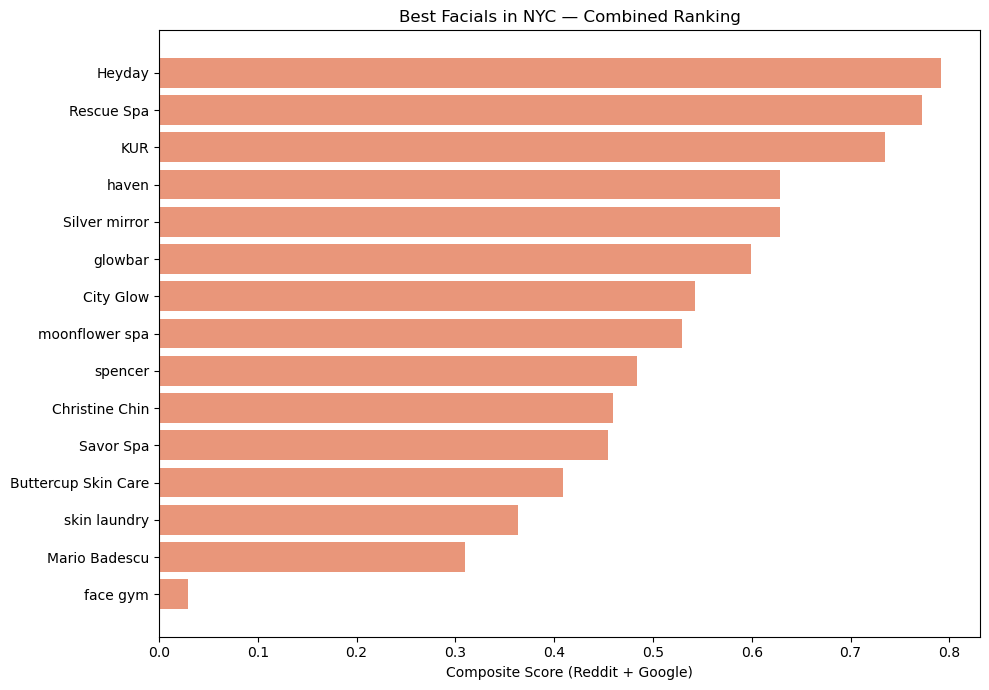

In [17]:
# ranking with reddit and google 
score_df = top_df.dropna(subset=["google_rating"]).copy()

scaler = MinMaxScaler()
score_df["mentions_scaled"] = scaler.fit_transform(score_df[["mentions"]])
score_df["rating_scaled"] = scaler.fit_transform(score_df[["google_rating"]])
score_df["composite_score"] = (score_df["mentions_scaled"] + score_df["rating_scaled"]) / 2
score_df = score_df.sort_values("composite_score", ascending=True)

plt.figure(figsize=(10, 7))
plt.barh(score_df["business"], score_df["composite_score"], color="darksalmon")
plt.xlabel("Composite Score (Reddit + Google)")
plt.title("Best Facials in NYC — Combined Ranking")
plt.tight_layout()
plt.savefig("plot5_composite.png")
plt.show()

**Reference list:**

Anthropic. (2026). Claude (4.6) [Large language model]. https://claude.ai/